In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_addons as tfa

In [5]:
sns.set_style("darkgrid")

In [6]:
df = pd.read_csv("carer.csv", index_col=0)
df = df[df["split"] == 1]
df.head()

,text,emotions,split
333346,i dont feel resigned to my fate because i know...,4,1
333347,i am feeling very grouchy since i returned,0,1
333348,i still feel shaken,1,1
333349,i was feeling very lonely and wanting to get a...,4,1
333350,im not as frustrated and crabby like i used to...,0,1


In [7]:
from decks import load_carer

ds, _, _ = load_carer(512)

2022-09-10 00:04:28.899888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-10 00:04:28.900134: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-10 00:04:28.900276: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-10 00:04:28.900359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-10 00:04:28.900433: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [92]:
from decks.nets import metrics
from decks.nets.utils import text_encoder

# def build_net(ds):
#     outputs = 6
#     h1, h2 = 45, 27

#     enc = text_encoder(ds, None)
#     model = tf.keras.Sequential(
#         [
#             enc,
#             tf.keras.layers.Embedding(
#                 input_dim=len(enc.get_vocabulary()),
#                 output_dim=h1,
#                 mask_zero=True,
#             ),
#             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(h1)),
#             tf.keras.layers.Dense(h2, activation="relu"),
#             tf.keras.layers.Dense(outputs, activation="softmax"),
#         ]
#     )
#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer="adam",
#         metrics=[
#             "accuracy",
#             *[metrics.PrecisionForClass(x) for x in range(outputs)],
#             *[metrics.RecallForClass(x) for x in range(outputs)],
#             *[metrics.MccForClass(x) for x in range(outputs)],
#         ],
#     )
#     return model

# def build_net(ds):
#     outputs = 6
#     h1, h2 = 67, 40

#     enc = text_encoder(ds, None)
#     model = tf.keras.Sequential(
#         [
#             enc,
#             tf.keras.layers.Embedding(
#                 input_dim=len(enc.get_vocabulary()),
#                 output_dim=h1,
#                 mask_zero=True,
#             ),
#             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(h1, dropout=0.5)),
#             tf.keras.layers.Dropout(0.5),
#             tf.keras.layers.Dense(h2, activation="relu"),
#             tf.keras.layers.Dense(outputs, activation="softmax"),
#         ]
#     )
#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer="adam",
#         metrics=[
#             "accuracy",
#             *[metrics.PrecisionForClass(x) for x in range(outputs)],
#             *[metrics.RecallForClass(x) for x in range(outputs)],
#             *[metrics.MccForClass(x) for x in range(outputs)],
#             *[metrics.F1ForClass(x) for x in range(outputs)],
#         ],
#     )
#     return model

# def build_net(ds):
#     outputs = 6
#     h1, h2 = 67, 40

#     enc = text_encoder(ds, None)
#     model = tf.keras.Sequential(
#         [
#             enc,
#             tf.keras.layers.Embedding(
#                 input_dim=len(enc.get_vocabulary()),
#                 output_dim=h1,
#                 mask_zero=True,
#             ),
#             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(h1, dropout=0.5)),
#             tf.keras.layers.Dropout(0.5),
#             tf.keras.layers.Dense(h2, activation="relu"),
#             tf.keras.layers.Dense(outputs, activation="softmax"),
#         ]
#     )
#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True),
#         metrics=[
#             "accuracy",
#             *[metrics.PrecisionForClass(x) for x in range(outputs)],
#             *[metrics.RecallForClass(x) for x in range(outputs)],
#             *[metrics.MccForClass(x) for x in range(outputs)],
#             *[metrics.F1ForClass(x) for x in range(outputs)],
#         ],
#     )
#     return model

def build_net(ds):
    outputs = 6
    h1, h2 = 67, 40

    enc = text_encoder(ds, None)
    model = tf.keras.Sequential(
        [
            enc,
            tf.keras.layers.Embedding(
                input_dim=len(enc.get_vocabulary()),
                output_dim=h1,
                mask_zero=True,
            ),
            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(h1, dropout=0.5)),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(h2),
            tf.keras.layers.LeakyReLU(alpha=0.01),
            tf.keras.layers.Dense(outputs, activation="softmax"),
        ]
    )
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
    )
    return model

# def build_net(ds):
#     outputs = 6
#     h1, h2 = 67, 40

#     enc = text_encoder(ds, None)
#     model = tf.keras.Sequential(
#         [
#             enc,
#             tf.keras.layers.Embedding(
#                 input_dim=len(enc.get_vocabulary()),
#                 output_dim=h1,
#                 mask_zero=True,
#             ),
#             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(h1, dropout=0.5)),
#             tf.keras.layers.Dropout(0.5),
#             tf.keras.layers.Dense(h2),
#             tfa.layers.Maxout(5),
#             tf.keras.layers.Dense(outputs, activation="softmax"),
#         ]
#     )
#     model.compile(
#         loss="sparse_categorical_crossentropy",
#         optimizer="adam",
#         metrics=[
#             "accuracy",
#             *[metrics.PrecisionForClass(x) for x in range(outputs)],
#             *[metrics.RecallForClass(x) for x in range(outputs)],
#             *[metrics.MccForClass(x) for x in range(outputs)],
#             *[metrics.F1ForClass(x) for x in range(outputs)],
#         ],
#     )
#     return model

In [88]:
GEN = 6
EPOCHS = 10

In [93]:
from decks import DATA_DIR

net = build_net(ds)
# weights = tf.train.latest_checkpoint(DATA_DIR / "checkpoints/2001-0100-0512")
weights = DATA_DIR / f"checkpoints/200{GEN}-0100-0512/cp-{EPOCHS:>04}.ckpt"
net.load_weights(weights)
weights

PosixPath('/home/parafoxia/Programs/Projects/decks/data/checkpoints/2006-0100-0512/cp-0010.ckpt')

In [97]:
y_true = df["emotions"].values
y_score = net.predict(df["text"].values)
y_pred = np.argmax(y_score, axis=1)

1283/1283 [==============================] - 9s 7ms/step


In [98]:
df["text"].values

array(['i dont feel resigned to my fate because i know there is no fate so maybe tomorrow i can change it all',
       'i am feeling very grouchy since i returned',
       'i still feel shaken', ...,
       'i are feeling anxious scout paces and frets with us',
       'i wear my shades upside down and sings powerpuff songs when im feeling naughty',
       'i can think of to describe it right now is that this is probably what gary feels whenever that obnoxious fat kid from our lunch pd opens his mouth'],
      dtype=object)

In [104]:
print(len(df["text"]))

41055


In [153]:
arr = np.array(["hello there mate"], dtype=object)
# arr = np.array(['mmm'], dtype=object)
print(arr)
net.predict(arr)

['hello there']


2022-09-10 18:47:12.647918: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: slice index 0 of dimension 0 out of bounds.
2022-09-10 18:47:12.648004: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at strided_slice_op.cc:105 : INVALID_ARGUMENT: slice index 0 of dimension 0 out of bounds.


InvalidArgumentError: Graph execution error:

Tried to stack list which only contains uninitialized tensors and has a non-fully-defined element_shape: [?,67]
	 [[{{node TensorArrayV2Stack/TensorListStack}}]]
	 [[sequential_10/bidirectional_10/backward_gru_10/PartitionedCall]] [Op:__inference_predict_function_296190]

In [82]:
acc = (np.count_nonzero(y_true == y_pred) / len(y_true)) * 100

tp, tn, fp, fn = 0, 0, 0, 0
pre, rec, mcc = [], [], []

for i in range(6):
    tp += np.count_nonzero((y_pred == i) & (y_true == i))
    tn += np.count_nonzero((y_pred != i) & (y_true != i))
    fp += np.count_nonzero((y_pred == i) & (y_true != i))
    fn += np.count_nonzero((y_pred != i) & (y_true == i))

    pre.append(tp / (tp + fp))
    rec.append(tp / (tp + fn))
    mcc.append((tp*tn - fp*fn) / (((tp+fn) * (tp+fp) * (tn+fp) * (tn+fn)) ** 0.5))

print(f"  ACC: {acc / 100:.3f}")
print(f"maPRE: {sum(pre) / len(pre):.3f}")
print(f"maREC: {sum(rec) / len(rec):.3f}")
print(f"maMCC: {sum(mcc) / len(mcc):.3f}")

  ACC: 0.895
maPRE: 0.900
maREC: 0.901
maMCC: 0.880


In [83]:
np.round(y_score[np.where(np.max(y_score, axis=1) == np.min(np.max(y_score, axis=1)))[0][0]], 3)

array([0.268, 0.164, 0.291, 0.097, 0.148, 0.032], dtype=float32)

In [84]:
from sklearn import metrics as skmetrics
from sklearn.preprocessing import normalize

data = skmetrics.confusion_matrix(y_true, y_pred)
data = normalize(data, axis=1, norm="l1") * 100

Text(95.72222222222221, 0.5, 'True label')

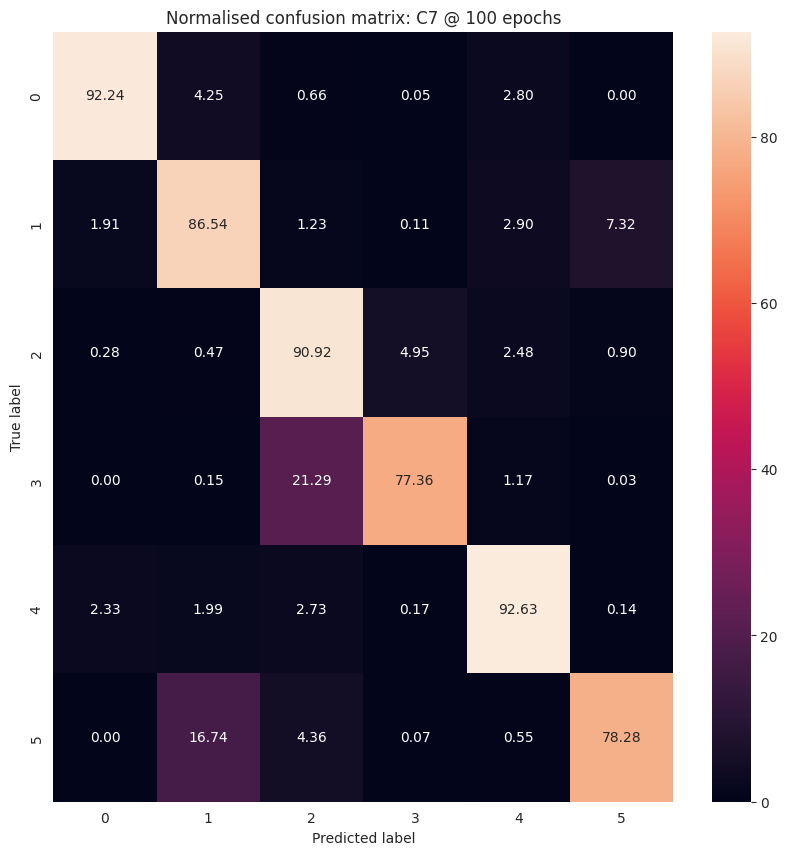

In [85]:
fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=data, annot=True, fmt=".2f")
ax.set_title(f"Normalised confusion matrix: C{GEN} @ {EPOCHS} epochs")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

In [86]:
samples = (
    "I can't believe you just that!",
    "What was that noise?",
    "I can't contain my excitement!",
    "This is amazing!",
    "Everything just fucking sucks.",
    "Oh my god, you did that for me?",
)
arr = net.predict(np.array(samples))
np.round(arr, 3)

1/1 [==============================] - 3s 3s/step


array([[0.268, 0.164, 0.291, 0.097, 0.148, 0.032],
       [0.597, 0.116, 0.154, 0.024, 0.108, 0.001],
       [0.176, 0.111, 0.582, 0.03 , 0.101, 0.001],
       [0.009, 0.077, 0.495, 0.061, 0.073, 0.286],
       [0.242, 0.004, 0.   , 0.   , 0.753, 0.   ],
       [0.204, 0.228, 0.181, 0.034, 0.332, 0.021]], dtype=float32)